In [1]:
import zipfile
import os


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-12-04 12:04:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.207, 173.194.197.207, 64.233.191.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   231MB/s    in 0.5s    

2023-12-04 12:04:12 (231 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
#!ls pizza_steak/train/pizza

In [7]:
for dir_path, dir_name, file_name in os.walk("pizza_steak"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path}")
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path}")
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path}")

There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak
There are 2 directories and 0 files in pizza_steak/test
There are 2 directories and 0 files in pizza_steak/test
There are 2 directories and 0 files in pizza_steak/test
There are 0 directories and 250 files in pizza_steak/test/pizza
There are 0 directories and 250 files in pizza_steak/test/pizza
There are 0 directories and 250 files in pizza_steak/test/pizza
There are 0 directories and 250 files in pizza_steak/test/steak
There are 0 directories and 250 files in pizza_steak/test/steak
There are 0 directories and 250 files in pizza_steak/test/steak
There are 2 directories and 0 files in pizza_steak/train
There are 2 directories and 0 files in pizza_steak/train
There are 2 directories and 0 files in pizza_steak/train
There are 0 directories and 750 files in pizza_steak/train/pizza
There are 0 directories and 750 files in pizza_steak/train/

In [8]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
print(num_steak_images_train)

750


In [9]:
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
print(num_pizza_images_train)

750


In [10]:
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
print(num_steak_images_test)

250


In [11]:
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
print(num_pizza_images_test)

250


In [12]:
import pathlib
import numpy as np

In [13]:
test_dataset_path = pathlib.Path("pizza_steak/train")
classes = np.array([item.name for item in test_dataset_path.glob("*")])
print(classes)

['pizza' 'steak']


In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [15]:
# function to visualize random images from the dataset.
def show_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # choose a random image.
  random_image = random.sample(os.listdir(target_folder), 1)

  # read the image.
  image = mpimg.imread(target_folder+ "/" + random_image[0])

  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape is: {image.shape}")

  return image

Image shape is: (512, 512, 3)


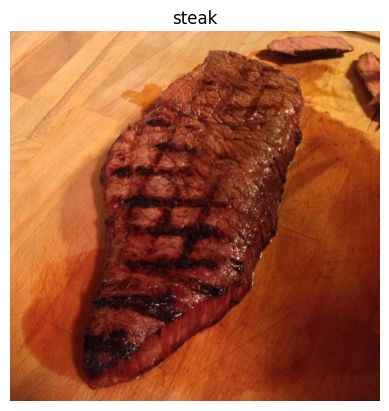

In [16]:
img = show_random_image("pizza_steak/train/", "steak")

In [17]:
print(img/255)

[[[0.8627451  0.67058824 0.44313725]
  [0.85098039 0.65882353 0.43137255]
  [0.84705882 0.64705882 0.42352941]
  ...
  [0.9254902  0.68235294 0.38039216]
  [0.9254902  0.68627451 0.37254902]
  [0.91764706 0.67843137 0.36470588]]

 [[0.84313725 0.64313725 0.41960784]
  [0.84313725 0.64313725 0.41960784]
  [0.84313725 0.64313725 0.41960784]
  ...
  [0.92941176 0.69019608 0.37647059]
  [0.9254902  0.68627451 0.37254902]
  [0.91764706 0.67843137 0.36078431]]

 [[0.84313725 0.63921569 0.41176471]
  [0.85098039 0.64705882 0.41960784]
  [0.85490196 0.65098039 0.42352941]
  ...
  [0.91372549 0.6745098  0.35686275]
  [0.90588235 0.66666667 0.34901961]
  [0.89411765 0.65490196 0.32941176]]

 ...

 [[0.49019608 0.23137255 0.09803922]
  [0.48235294 0.22352941 0.09019608]
  [0.46666667 0.20784314 0.08235294]
  ...
  [0.31372549 0.08235294 0.05882353]
  [0.30980392 0.07843137 0.05490196]
  [0.30196078 0.07058824 0.04705882]]

 [[0.4745098  0.21568627 0.08235294]
  [0.4745098  0.21568627 0.08235294]


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [19]:
train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_data_gen.flow_from_directory(
    directory = train_dir,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32
)

valid_data = test_data_gen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    target_size=(256,256)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
image, label = train_data.next()

In [21]:
image.shape

(32, 256, 256, 3)

In [22]:
label.shape

(32,)

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [24]:
model = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(256, 256, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [26]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 17s 129ms/step - loss: 0.6195 - accuracy: 0.6433 - val_loss: 0.4172 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4500 - accuracy: 0.8000 - val_loss: 0.3653 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3854 - accuracy: 0.8373 - val_loss: 0.3590 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 7s 146ms/step - loss: 0.3518 - accuracy: 0.8540 - val_loss: 0.3211 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.2960 - accuracy: 0.8893 - val_loss: 0.3023 - val_accuracy: 0.8700


<Axes: >

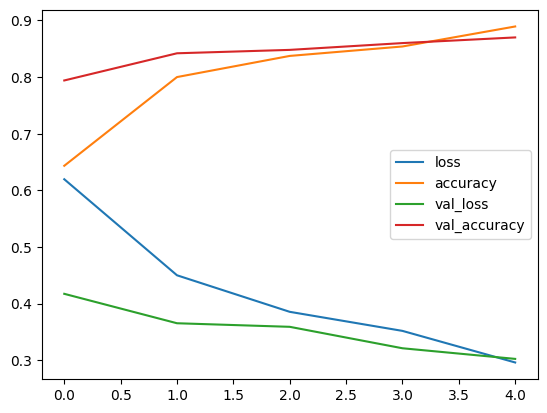

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 flatten (Flatten)           (None, 36000)             0

In [29]:
print(classes)

['pizza' 'steak']


In [31]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-12-04 12:21:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-12-04 12:21:14 (28.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [30]:
def load_and_prepare_images(image, image_shape=256):
  img = tf.io.read_file(image)
  # conver the img into tensor format.
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[image_shape, image_shape])

  img = img/255

  return img


In [33]:
steak_img = load_and_prepare_images("03-steak.jpeg")

In [35]:
steak = tf.expand_dims(steak_img, axis=0)

In [36]:
steak.shape

TensorShape([1, 256, 256, 3])

In [37]:
steak_2 = tf.expand_dims(steak_img, axis = 1)

In [38]:
steak_2.shape

TensorShape([256, 1, 256, 3])

In [39]:
steak_3 = tf.expand_dims(steak_img, axis=3)

In [40]:
steak_3.shape

TensorShape([256, 256, 3, 1])

In [42]:
pred = model.predict(steak)
pred

1/1 [==============================] - 0s 67ms/step


array([[0.6958461]], dtype=float32)

In [44]:
pred[0][0]

0.6958461

In [45]:
final_pred = classes[int(tf.round(pred[0][0]))]
final_pred

'steak'

In [46]:
def predict_image(model, load_and_prepare_images, image, classes):
  img_bef_exp = load_and_prepare_images(image)
  img = tf.expand_dims(img_bef_exp, axis=0)

  pred_prob = model.predict(img)
  pred = classes[int(tf.round(pred_prob[0][0]))]

  plt.imshow(img_bef_exp)
  plt.title(f"Prediction: {pred}")
  plt.axis(False)

1/1 [==============================] - 0s 20ms/step


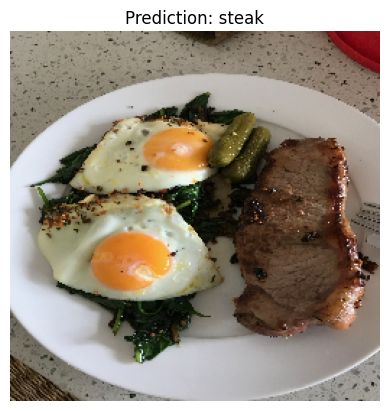

In [47]:
predict_image(model, load_and_prepare_images, "03-steak.jpeg", classes)